In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('fatal-shootings').getOrCreate()

# Load training data. 
data = spark.read.csv('fatal-police-shootings-data.csv',inferSchema=True,header=True)

In [4]:
id_name = data.select([c for c in data.columns if c in 
                       ['id','name']])

In [5]:
id_name.show()

+---+--------------------+
| id|                name|
+---+--------------------+
|  3|          Tim Elliot|
|  4|    Lewis Lee Lembke|
|  5|  John Paul Quintero|
|  8|     Matthew Hoffman|
|  9|   Michael Rodriguez|
| 11|   Kenneth Joe Brown|
| 13| Kenneth Arnold Buck|
| 15|       Brock Nichols|
| 16|       Autumn Steele|
| 17|     Leslie Sapp III|
| 19|      Patrick Wetter|
| 21|           Ron Sneed|
| 22|Hashim Hanif Ibn ...|
| 25|Nicholas Ryan Bri...|
| 27|Omarr Julian Maxi...|
| 29|       Loren Simpson|
| 32| James Dudley Barker|
| 36| Artago Damon Howard|
| 37|        Thomas Hamby|
| 38|       Jimmy Foreman|
+---+--------------------+
only showing top 20 rows



In [3]:
# Understand the dataset
data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- date: string (nullable = true)
 |-- manner_of_death: string (nullable = true)
 |-- armed: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- race: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- signs_of_mental_illness: boolean (nullable = true)
 |-- threat_level: string (nullable = true)
 |-- flee: string (nullable = true)
 |-- body_camera: boolean (nullable = true)



In [39]:
data.show()

In [2]:
#Spark Formatting of Data

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler


In [12]:
data.columns

['id',
 'name',
 'date',
 'manner_of_death',
 'armed',
 'age',
 'gender',
 'race',
 'city',
 'state',
 'signs_of_mental_illness',
 'threat_level',
 'flee',
 'body_camera']

In [13]:
print((data.count(), len(data.columns)))

(5338, 14)


In [14]:
data.describe().show()

+-------+------------------+--------------------+--------+----------------+--------------+------------------+------+----+--------------------+-----+------------+-----+
|summary|                id|                name|    date| manner_of_death|         armed|               age|gender|race|                city|state|threat_level| flee|
+-------+------------------+--------------------+--------+----------------+--------------+------------------+------+----+--------------------+-----+------------+-----+
|  count|              5338|                5338|    5338|            5338|          5098|              5089|  5336|4731|                5338| 5338|        5338| 5088|
|   mean|2967.7838141626075|                null|    null|            null|          null| 37.12163489880134|  null|null|                null| null|        null| null|
| stddev|1671.1661520510786|                null|    null|            null|          null|13.127052909213768|  null|null|                null| null|        null

In [18]:
data.groupBy('manner_of_death').count().show()

+----------------+-----+
| manner_of_death|count|
+----------------+-----+
|shot and Tasered|  266|
|            shot| 5072|
+----------------+-----+



In [28]:
armed = data.groupBy('armed').count()
armed.show()

+-------------------+-----+
|              armed|count|
+-------------------+-----+
|         metal pole|    2|
|         motorcycle|    1|
|           crossbow|    9|
|                pen|    1|
|           nail gun|    1|
|  incendiary device|    2|
|     Airsoft pistol|    1|
|              knife|  780|
|    hatchet and gun|    2|
|            bayonet|    1|
|            stapler|    1|
|guns and explosives|    3|
|       bean-bag gun|    1|
|            unarmed|  318|
|          tire iron|    1|
|        garden tool|    2|
|               null|  240|
|             wrench|    1|
|           barstool|    1|
|    metal hand tool|    1|
+-------------------+-----+
only showing top 20 rows



In [5]:
data.groupBy('gender').count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|  234|
|  null|    2|
|     M| 5102|
+------+-----+



In [6]:
data.groupBy('race').count().show()

+----+-----+
|race|count|
+----+-----+
|null|  607|
|   B| 1254|
|   O|   47|
|   A|   91|
|   N|   76|
|   W| 2385|
|   H|  878|
+----+-----+



In [7]:
data.groupBy('signs_of_mental_illness').count().show()

+-----------------------+-----+
|signs_of_mental_illness|count|
+-----------------------+-----+
|                   true| 1195|
|                  false| 4143|
+-----------------------+-----+



In [8]:
data.groupBy('threat_level').count().show()

+------------+-----+
|threat_level|count|
+------------+-----+
|      attack| 3434|
|       other| 1643|
|undetermined|  261|
+------------+-----+



In [9]:
data.groupBy('flee').count().show()

+-----------+-----+
|       flee|count|
+-----------+-----+
|Not fleeing| 3356|
|       null|  250|
|       Foot|  684|
|        Car|  889|
|      Other|  159|
+-----------+-----+



In [10]:
data.groupBy('body_camera').count().show()

+-----------+-----+
|body_camera|count|
+-----------+-----+
|       true|  599|
|      false| 4739|
+-----------+-----+



In [9]:
import pandas as pd
dataPandas = pd.read_csv('fatal-police-shootings-data.csv')

In [7]:
dataPandas.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [10]:
new_age = pd.cut(dataPandas.age, bins=[0, 20, 30,40,50,100], labels=["(0-20]","(20-30]","(30-40]","(40-50]","(50-100]"])
dataPandas['new_age'] = new_age
dataPandas

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,new_age
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,(50-100]
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,(40-50]
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,(20-30]
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,(30-40]
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,(30-40]
5,11,Kenneth Joe Brown,1/4/2015,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,(0-20]
6,13,Kenneth Arnold Buck,1/5/2015,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,(20-30]
7,15,Brock Nichols,1/6/2015,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,(30-40]
8,16,Autumn Steele,1/6/2015,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,(30-40]
9,17,Leslie Sapp III,1/6/2015,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,(40-50]


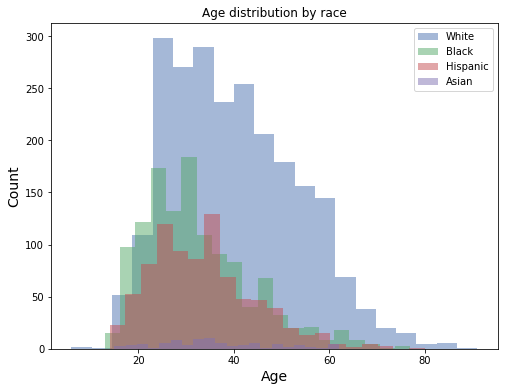

In [37]:
import numpy as np
import matplotlib.pyplot as plt

data1 = (dataPandas[dataPandas.race == 'W'].dropna(subset=['age']))['age']
data2 = (dataPandas[dataPandas.race == 'B'].dropna(subset=['age']))['age']
data3 = (dataPandas[dataPandas.race == 'H'].dropna(subset=['age']))['age']
data4 = (dataPandas[dataPandas.race == 'A'].dropna(subset=['age']))['age']

plt.figure(figsize=(8,6))
plt.hist(data1, bins=20, alpha=0.5, label="White")
plt.hist(data2, bins=20, alpha=0.5, label="Black")
plt.hist(data3, bins=20, alpha=0.5, label="Hispanic")
plt.hist(data4, bins=20, alpha=0.5, label="Asian")
plt.xlabel("Age", size=14)
plt.ylabel("Count", size=14)
plt.title("Age distribution by race")
plt.legend(loc='upper right')

Text(0,0.5,'Number of cases')

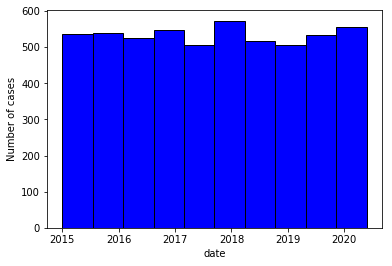

In [4]:
from datetime import datetime
import matplotlib.pyplot as plt

dataPandas['date'] = pd.to_datetime(dataPandas['date'])


plt.hist(dataPandas['date'], color='blue', edgecolor = 'black')
plt.xlabel('date')
plt.ylabel('Number of cases')

In [31]:
data.select('date').show(5500, False)

+----------+
|date      |
+----------+
|1/2/2015  |
|1/2/2015  |
|1/3/2015  |
|1/4/2015  |
|1/4/2015  |
|1/4/2015  |
|1/5/2015  |
|1/6/2015  |
|1/6/2015  |
|1/6/2015  |
|1/6/2015  |
|1/7/2015  |
|1/7/2015  |
|1/7/2015  |
|1/7/2015  |
|1/8/2015  |
|1/8/2015  |
|1/8/2015  |
|1/8/2015  |
|1/9/2015  |
|1/9/2015  |
|1/11/2015 |
|1/11/2015 |
|1/11/2015 |
|1/13/2015 |
|1/13/2015 |
|1/14/2015 |
|1/14/2015 |
|1/14/2015 |
|1/14/2015 |
|1/14/2015 |
|1/14/2015 |
|1/15/2015 |
|1/15/2015 |
|1/15/2015 |
|1/15/2015 |
|1/15/2015 |
|1/16/2015 |
|1/16/2015 |
|1/17/2015 |
|1/17/2015 |
|1/17/2015 |
|1/18/2015 |
|1/18/2015 |
|1/19/2015 |
|1/20/2015 |
|1/21/2015 |
|1/21/2015 |
|1/21/2015 |
|1/21/2015 |
|1/22/2015 |
|1/22/2015 |
|1/23/2015 |
|1/23/2015 |
|1/23/2015 |
|1/24/2015 |
|1/24/2015 |
|1/24/2015 |
|1/25/2015 |
|1/25/2015 |
|1/26/2015 |
|1/26/2015 |
|1/26/2015 |
|1/26/2015 |
|1/27/2015 |
|1/27/2015 |
|1/27/2015 |
|1/27/2015 |
|1/28/2015 |
|1/28/2015 |
|1/28/2015 |
|1/29/2015 |
|1/29/2015 |
|1/30/2015 |

In [7]:
data.groupBy('armed').count().show(100,False)

+--------------------------------+-----+
|armed                           |count|
+--------------------------------+-----+
|metal pole                      |2    |
|motorcycle                      |1    |
|crossbow                        |9    |
|pen                             |1    |
|nail gun                        |1    |
|incendiary device               |2    |
|Airsoft pistol                  |1    |
|knife                           |780  |
|hatchet and gun                 |2    |
|bayonet                         |1    |
|stapler                         |1    |
|guns and explosives             |3    |
|bean-bag gun                    |1    |
|unarmed                         |318  |
|tire iron                       |1    |
|garden tool                     |2    |
|null                            |240  |
|wrench                          |1    |
|barstool                        |1    |
|metal hand tool                 |1    |
|gun and knife                   |17   |
|spear          

Text(0,0.5,'Number of cases')

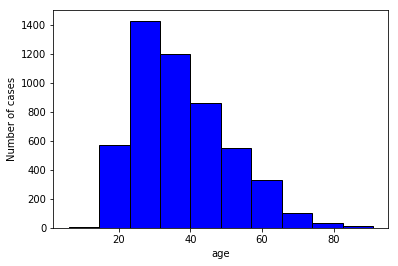

In [58]:
age = (dataPandas.dropna(subset=['age']))['age']
plt.hist(age, color='blue', edgecolor = 'black')
plt.xlabel('age')
plt.ylabel('Number of cases')

In [3]:
from pyspark.sql.functions import isnan, when, count, col

data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns]).show()

+---+----+----+---------------+-----+---+------+----+----+-----+-----------------------+------------+----+-----------+
| id|name|date|manner_of_death|armed|age|gender|race|city|state|signs_of_mental_illness|threat_level|flee|body_camera|
+---+----+----+---------------+-----+---+------+----+----+-----+-----------------------+------------+----+-----------+
|  0|   0|   0|              0|  240|249|     2| 607|   0|    0|                      0|           0| 250|          0|
+---+----+----+---------------+-----+---+------+----+----+-----+-----------------------+------------+----+-----------+



In [4]:
dataSub = data.select([c for c in data.columns if c in 
                       ['armed','age','gender','race','signs_of_mental_illness','threat_level','flee']])
dataSub.show()

+----------+---+------+----+-----------------------+------------+-----------+
|     armed|age|gender|race|signs_of_mental_illness|threat_level|       flee|
+----------+---+------+----+-----------------------+------------+-----------+
|       gun| 53|     M|   A|                   true|      attack|Not fleeing|
|       gun| 47|     M|   W|                  false|      attack|Not fleeing|
|   unarmed| 23|     M|   H|                  false|       other|Not fleeing|
|toy weapon| 32|     M|   W|                   true|      attack|Not fleeing|
|  nail gun| 39|     M|   H|                  false|      attack|Not fleeing|
|       gun| 18|     M|   W|                  false|      attack|Not fleeing|
|       gun| 22|     M|   H|                  false|      attack|        Car|
|       gun| 35|     M|   W|                  false|      attack|Not fleeing|
|   unarmed| 34|     F|   W|                  false|       other|Not fleeing|
|toy weapon| 47|     M|   B|                  false|      attack

In [5]:
dataSub.select([count(when(col(c).isNull(), c)).alias(c) for c in dataSub.columns]).show()

+-----+---+------+----+-----------------------+------------+----+
|armed|age|gender|race|signs_of_mental_illness|threat_level|flee|
+-----+---+------+----+-----------------------+------------+----+
|  240|249|     2| 607|                      0|           0| 250|
+-----+---+------+----+-----------------------+------------+----+



In [6]:
dataSub2 = dataSub.na.drop()

In [10]:
dataSub2.select([count(when(col(c).isNull(), c)).alias(c) for c in dataSub2.columns]).show()

+-----+---+------+----+-----------------------+------------+----+
|armed|age|gender|race|signs_of_mental_illness|threat_level|flee|
+-----+---+------+----+-----------------------+------------+----+
|    0|  0|     0|   0|                      0|           0|   0|
+-----+---+------+----+-----------------------+------------+----+



In [7]:
from pyspark.sql.functions import col    
dataSub3 =  dataSub2.withColumn(
    "armed",
    when(
        col("armed").isin('gun','knife','unarmed'),
        col("armed")
    ).otherwise("Other")
)

dataSub3.show()

+-------+---+------+----+-----------------------+------------+-----------+
|  armed|age|gender|race|signs_of_mental_illness|threat_level|       flee|
+-------+---+------+----+-----------------------+------------+-----------+
|    gun| 53|     M|   A|                   true|      attack|Not fleeing|
|    gun| 47|     M|   W|                  false|      attack|Not fleeing|
|unarmed| 23|     M|   H|                  false|       other|Not fleeing|
|  Other| 32|     M|   W|                   true|      attack|Not fleeing|
|  Other| 39|     M|   H|                  false|      attack|Not fleeing|
|    gun| 18|     M|   W|                  false|      attack|Not fleeing|
|    gun| 22|     M|   H|                  false|      attack|        Car|
|    gun| 35|     M|   W|                  false|      attack|Not fleeing|
|unarmed| 34|     F|   W|                  false|       other|Not fleeing|
|  Other| 47|     M|   B|                  false|      attack|Not fleeing|
|  knife| 25|     M|   W|

In [12]:
dataSub3.groupBy('armed').count().show()

+-------+-----+
|  armed|count|
+-------+-----+
|  knife|  638|
|unarmed|  300|
|  Other|  802|
|    gun| 2483|
+-------+-----+



In [8]:
from pyspark.sql.types import DoubleType
changedTypedf = dataSub3.withColumn("age", dataSub3["age"].cast(DoubleType()))

from pyspark.ml.feature import Bucketizer

bucketizer = Bucketizer(splits=[ 0, 20, 30, 40, 50, 100 ],inputCol="age", outputCol="buckets")
dataSub4 = bucketizer.setHandleInvalid("keep").transform(changedTypedf)

dataSub4.show()

+-------+----+------+----+-----------------------+------------+-----------+-------+
|  armed| age|gender|race|signs_of_mental_illness|threat_level|       flee|buckets|
+-------+----+------+----+-----------------------+------------+-----------+-------+
|    gun|53.0|     M|   A|                   true|      attack|Not fleeing|    4.0|
|    gun|47.0|     M|   W|                  false|      attack|Not fleeing|    3.0|
|unarmed|23.0|     M|   H|                  false|       other|Not fleeing|    1.0|
|  Other|32.0|     M|   W|                   true|      attack|Not fleeing|    2.0|
|  Other|39.0|     M|   H|                  false|      attack|Not fleeing|    2.0|
|    gun|18.0|     M|   W|                  false|      attack|Not fleeing|    0.0|
|    gun|22.0|     M|   H|                  false|      attack|        Car|    1.0|
|    gun|35.0|     M|   W|                  false|      attack|Not fleeing|    2.0|
|unarmed|34.0|     F|   W|                  false|       other|Not fleeing| 

In [15]:
dataSub4.groupBy('buckets').count().show()

+-------+-----+
|buckets|count|
+-------+-----+
|    0.0|  240|
|    1.0| 1198|
|    4.0|  730|
|    3.0|  779|
|    2.0| 1276|
+-------+-----+



In [9]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

t = {0.0:"[6-20)", 1.0: "[20-30)", 2.0:"[30-40)", 3.0: "[40-50)", 4.0: "[50-91]"}
udf_foo = udf(lambda x: t[x], StringType())
dataSub5 = dataSub4.withColumn("age_bucket", udf_foo("buckets"))
dataSub5.show()

+-------+----+------+----+-----------------------+------------+-----------+-------+----------+
|  armed| age|gender|race|signs_of_mental_illness|threat_level|       flee|buckets|age_bucket|
+-------+----+------+----+-----------------------+------------+-----------+-------+----------+
|    gun|53.0|     M|   A|                   true|      attack|Not fleeing|    4.0|   [50-91]|
|    gun|47.0|     M|   W|                  false|      attack|Not fleeing|    3.0|   [40-50)|
|unarmed|23.0|     M|   H|                  false|       other|Not fleeing|    1.0|   [20-30)|
|  Other|32.0|     M|   W|                   true|      attack|Not fleeing|    2.0|   [30-40)|
|  Other|39.0|     M|   H|                  false|      attack|Not fleeing|    2.0|   [30-40)|
|    gun|18.0|     M|   W|                  false|      attack|Not fleeing|    0.0|    [6-20)|
|    gun|22.0|     M|   H|                  false|      attack|        Car|    1.0|   [20-30)|
|    gun|35.0|     M|   W|                  false|

In [33]:
dataSub5.groupBy('age_bucket').count().show()

+----------+-----+
|age_bucket|count|
+----------+-----+
|   [40-50)|  779|
|   [50-91]|  730|
|   [20-30)| 1198|
|   [30-40)| 1276|
|    [6-20)|  240|
+----------+-----+



In [13]:
dataSub5.groupBy('threat_level').count().show()

+------------+-----+
|threat_level|count|
+------------+-----+
|      attack| 2798|
|       other| 1261|
|undetermined|  164|
+------------+-----+



In [10]:
from pyspark.sql.functions import when

dataSub6 = dataSub5.withColumn("threat_level", \
              when(dataSub5["threat_level"] == 'undetermined', 'other').otherwise(dataSub5["threat_level"]))


In [15]:
dataSub6.groupBy('threat_level').count().show()

+------------+-----+
|threat_level|count|
+------------+-----+
|      attack| 2798|
|       other| 1425|
+------------+-----+



In [17]:
dataSub6.groupBy('race').count().show()

+----+-----+
|race|count|
+----+-----+
|   B| 1117|
|   O|   42|
|   A|   82|
|   N|   68|
|   W| 2153|
|   H|  761|
+----+-----+



In [11]:
dataSub7 = dataSub6.withColumn("race", \
              when(dataSub6["race"] == 'N', 'O').otherwise(dataSub6["race"]))

In [19]:
dataSub7.groupBy('race').count().show()

+----+-----+
|race|count|
+----+-----+
|   B| 1117|
|   O|  110|
|   A|   82|
|   W| 2153|
|   H|  761|
+----+-----+



In [23]:
str(dataSub7)

'DataFrame[armed: string, age: double, gender: string, race: string, signs_of_mental_illness: boolean, threat_level: string, flee: string, buckets: double, age_bucket: string]'

In [12]:
# Change the data type of column 'signs_of_mental_illness'
dataSub8 = dataSub7.withColumn("signs_of_mental_illness", dataSub7["signs_of_mental_illness"].cast('integer'))

In [22]:
str(dataSub8)

'DataFrame[armed: string, age: double, gender: string, race: string, signs_of_mental_illness: int, threat_level: string, flee: string, buckets: double, age_bucket: string]'

In [13]:
dataFinal = dataSub8.select([c for c in dataSub7.columns if c in 
                       ['armed','gender','race','signs_of_mental_illness','threat_level','flee','age_bucket']])
dataFinal.show()

+-------+------+----+-----------------------+------------+-----------+----------+
|  armed|gender|race|signs_of_mental_illness|threat_level|       flee|age_bucket|
+-------+------+----+-----------------------+------------+-----------+----------+
|    gun|     M|   A|                      1|      attack|Not fleeing|   [50-91]|
|    gun|     M|   W|                      0|      attack|Not fleeing|   [40-50)|
|unarmed|     M|   H|                      0|       other|Not fleeing|   [20-30)|
|  Other|     M|   W|                      1|      attack|Not fleeing|   [30-40)|
|  Other|     M|   H|                      0|      attack|Not fleeing|   [30-40)|
|    gun|     M|   W|                      0|      attack|Not fleeing|    [6-20)|
|    gun|     M|   H|                      0|      attack|        Car|   [20-30)|
|    gun|     M|   W|                      0|      attack|Not fleeing|   [30-40)|
|unarmed|     F|   W|                      0|       other|Not fleeing|   [30-40)|
|  Other|     M|

In [51]:
dataFinal.write.csv('dataFinal.csv')

In [14]:
# It needs to be in the form of two columns: "label" and "features".

# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [15]:
# Import the string indexer (similar to the logistic regression exercises).
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="armed", outputCol="armedIndex")
indexed = indexer.fit(dataFinal).transform(dataFinal)

indexer = StringIndexer(inputCol="gender", outputCol="genderIndex")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="threat_level", outputCol="threat_levelIndex")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="flee", outputCol="fleeIndex")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="age_bucket", outputCol="ageIndex")
indexed = indexer.fit(indexed).transform(indexed)

indexer2 = StringIndexer(inputCol="race", outputCol="label")
indexed = indexer2.fit(indexed).transform(indexed)

In [27]:
indexed.show()

+-------+------+----+-----------------------+------------+-----------+----------+----------+-----------+-----------------+---------+--------+-----+
|  armed|gender|race|signs_of_mental_illness|threat_level|       flee|age_bucket|armedIndex|genderIndex|threat_levelIndex|fleeIndex|ageIndex|label|
+-------+------+----+-----------------------+------------+-----------+----------+----------+-----------+-----------------+---------+--------+-----+
|    gun|     M|   A|                      1|      attack|Not fleeing|   [50-91]|       0.0|        0.0|              0.0|      0.0|     3.0|  4.0|
|    gun|     M|   W|                      0|      attack|Not fleeing|   [40-50)|       0.0|        0.0|              0.0|      0.0|     2.0|  0.0|
|unarmed|     M|   H|                      0|       other|Not fleeing|   [20-30)|       3.0|        0.0|              1.0|      0.0|     1.0|  2.0|
|  Other|     M|   W|                      1|      attack|Not fleeing|   [30-40)|       1.0|        0.0|        

In [16]:
assembler = VectorAssembler(
  inputCols= 
             ['armedIndex',
             'genderIndex',
             'signs_of_mental_illness',
             'threat_levelIndex',
             'fleeIndex',
             'ageIndex'],
              outputCol="features")

# Let's transform the data. 
output = assembler.transform(indexed)
output.show()

+-------+------+----+-----------------------+------------+-----------+----------+----------+-----------+-----------------+---------+--------+-----+--------------------+
|  armed|gender|race|signs_of_mental_illness|threat_level|       flee|age_bucket|armedIndex|genderIndex|threat_levelIndex|fleeIndex|ageIndex|label|            features|
+-------+------+----+-----------------------+------------+-----------+----------+----------+-----------+-----------------+---------+--------+-----+--------------------+
|    gun|     M|   A|                      1|      attack|Not fleeing|   [50-91]|       0.0|        0.0|              0.0|      0.0|     3.0|  4.0| (6,[2,5],[1.0,3.0])|
|    gun|     M|   W|                      0|      attack|Not fleeing|   [40-50)|       0.0|        0.0|              0.0|      0.0|     2.0|  0.0|       (6,[5],[2.0])|
|unarmed|     M|   H|                      0|       other|Not fleeing|   [20-30)|       3.0|        0.0|              1.0|      0.0|     1.0|  2.0|[3.0,0.0

In [17]:
train, test = output.randomSplit([0.7, 0.3],seed = 2019)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 2930
Test Dataset Count: 1293


In [18]:
# 1
# Import the relevant classifiers. 
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

# Decision Tree.
# Use defaults of the classifier
dtc = DecisionTreeClassifier(labelCol='label',featuresCol='features', maxDepth = 5)

# Train the model
dtc_model = dtc.fit(train)

# Predict the test data
dtc_predictions = dtc_model.transform(test)


In [19]:
# Prepare for the evaluation
from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_binary_eval = BinaryClassificationEvaluator(labelCol = 'label')

# Print the evaluation result
print("The area under the curve is",my_binary_eval.evaluate(dtc_predictions))

The area under the curve is 0.6347928031390563


In [39]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator_1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_1 = evaluator_1.evaluate(dtc_predictions)
print("Accuracy is", accuracy_1)

Accuracy is 0.5282289249806651


In [33]:
# Print the tree
print(dtc_model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4a94915fd3771159a9d9) of depth 5 with 63 nodes
  If (feature 5 in {2.0,3.0})
   If (feature 0 in {0.0})
    If (feature 5 in {2.0})
     If (feature 1 in {0.0})
      If (feature 3 in {0.0})
       Predict: 0.0
      Else (feature 3 not in {0.0})
       Predict: 0.0
     Else (feature 1 not in {0.0})
      If (feature 3 in {0.0})
       Predict: 0.0
      Else (feature 3 not in {0.0})
       Predict: 0.0
    Else (feature 5 not in {2.0})
     If (feature 4 in {1.0})
      If (feature 3 in {0.0})
       Predict: 0.0
      Else (feature 3 not in {0.0})
       Predict: 0.0
     Else (feature 4 not in {1.0})
      If (feature 2 <= 0.0)
       Predict: 0.0
      Else (feature 2 > 0.0)
       Predict: 0.0
   Else (feature 0 not in {0.0})
    If (feature 0 in {1.0})
     If (feature 3 in {0.0})
      If (feature 4 in {0.0})
       Predict: 0.0
      Else (feature 4 not in {0.0})
       Predict: 0.0
     Else (feature 3 not in {0.0})


In [21]:
# 3. Random Forest
# Use defaults of the classifier
rfc = RandomForestClassifier(labelCol='label',featuresCol='features')

# Train the model
rfc_model = rfc.fit(train)

# Predict the test data
rfc_predictions = rfc_model.transform(test)

In [57]:
#rfc_predictions.show()

In [22]:
# RFC improves accuracy but also model complexity.
print("The area under the curve is", my_binary_eval.evaluate(rfc_predictions))

The area under the curve is 0.6869174083644367


In [40]:
evaluator_3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_3 = evaluator_3.evaluate(rfc_predictions)
print("Accuracy is", accuracy_3)

Accuracy is 0.5290023201856149


In [23]:
# Print the random forest
print(rfc_model.toDebugString)

RandomForestClassificationModel (uid=rfc_112ca4b51e10) with 20 trees
  Tree 0 (weight 1.0):
    If (feature 2 <= 0.0)
     If (feature 4 in {0.0,1.0})
      If (feature 5 in {0.0,2.0,3.0})
       If (feature 5 in {0.0,2.0})
        If (feature 5 in {0.0})
         Predict: 0.0
        Else (feature 5 not in {0.0})
         Predict: 0.0
       Else (feature 5 not in {0.0,2.0})
        If (feature 0 in {0.0,1.0})
         Predict: 0.0
        Else (feature 0 not in {0.0,1.0})
         Predict: 0.0
      Else (feature 5 not in {0.0,2.0,3.0})
       If (feature 0 in {2.0})
        If (feature 3 in {0.0})
         Predict: 0.0
        Else (feature 3 not in {0.0})
         Predict: 2.0
       Else (feature 0 not in {2.0})
        If (feature 5 in {1.0})
         Predict: 1.0
        Else (feature 5 not in {1.0})
         Predict: 1.0
     Else (feature 4 not in {0.0,1.0})
      If (feature 5 in {2.0,3.0})
       If (feature 0 in {0.0,1.0})
        If (feature 0 in {0.0})
         Predict: 0

In [24]:
# 4 Random Forest
# cross validation

from pyspark.ml.tuning import ParamGridBuilder
import numpy as np

paramGrid_rfc = ParamGridBuilder() \
    .addGrid(rfc.numTrees, [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]) \
    .addGrid(rfc.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 25, num = 3)]) \
    .build()

In [25]:
trainingData, testData = output.randomSplit([0.9, 0.1])

In [26]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

crossval_rfc = CrossValidator(estimator=rfc,
                          estimatorParamMaps=paramGrid_rfc,
                          evaluator=RegressionEvaluator(),
                          numFolds=3)

In [38]:
# Fit the cross validation
cvModel_rfc = crossval_rfc.fit(trainingData)

In [48]:
# Prediction
prediction_rfc = cvModel_rfc.transform(testData)

In [49]:
my_binary_eval_rfc = BinaryClassificationEvaluator(labelCol = 'label')
print("The area under the curve is", my_binary_eval_rfc.evaluate(prediction_rfc))

The area under the curve is 0.6451895389913024


In [50]:
evaluator_4 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_4 = evaluator_4.evaluate(prediction_rfc)
print("Accuracy is", accuracy_4)

Accuracy is 0.5543478260869565


In [30]:
# 2 Decision Tree
# cross validation for decision tree

from pyspark.ml.tuning import ParamGridBuilder
import numpy as np

paramGrid_dtc = ParamGridBuilder() \
    .addGrid(dtc.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 25, num = 3)]) \
    .build()

In [31]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

crossval_dtc = CrossValidator(estimator=dtc,
                          estimatorParamMaps=paramGrid_dtc,
                          evaluator=RegressionEvaluator(),
                          numFolds=3)

In [32]:
# Fit the cross validation
cvModel_dtc = crossval_dtc.fit(trainingData)

In [36]:
# Prediction
prediction_dtc = cvModel_dtc.transform(testData)

my_binary_eval_dtc = BinaryClassificationEvaluator(labelCol = 'label')
print("The area under the curve is", my_binary_eval_dtc.evaluate(prediction_dtc))

The area under the curve is 0.6014189449936175


In [47]:
evaluator_2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_2 = evaluator_2.evaluate(prediction_dtc)
print("Accuracy is", accuracy_2)

Accuracy is 0.5543478260869565
